###  Importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading of movies.csv file 
movie=pd.read_csv("movie_data/movies.csv")
ratings=pd.read_csv("movie_data/ratings.csv")
links=pd.read_csv("movie_data/links.csv")
tags=pd.read_csv("movie_data/tags.csv")

In [3]:
print("Movie : ", movie.columns,end="\n\n")
print("Rating : ", ratings.columns,end="\n\n")
print("Links : ", links.columns,end="\n\n")
print("Tags : ", tags.columns,end="\n\n")

Movie :  Index(['movieId', 'title', 'genres'], dtype='object')

Rating :  Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

Links :  Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

Tags :  Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')



In [4]:
movie.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:
print(movie.shape)
print(ratings.shape)
print(links.shape)
print(tags.shape,end="\n\n")

(9742, 3)
(100836, 4)
(9742, 3)
(3683, 4)



In [9]:
movie.info()
ratings.info()
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-nul

In [10]:
num_unique_users = ratings['userId'].nunique()

print(f"There are {num_unique_users} unique userIds in the ratings.csv file.")

There are 610 unique userIds in the ratings.csv file.


In [11]:
rating_counts = ratings['movieId'].value_counts()

# Get the movieId of the movie with the most ratings
most_rated_movieId = rating_counts.idxmax()

print(f"The movieId of the movie with the most user ratings is {most_rated_movieId}.")

The movieId of the movie with the most user ratings is 356.


In [12]:
# Filter for tags related to "Matrix, The (1999)"
matrix_tags = tags[tags['movieId'] == 'Matrix, The (1999)']

# Print the unique tags
print(matrix_tags['tag'].unique())

[]


In [13]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


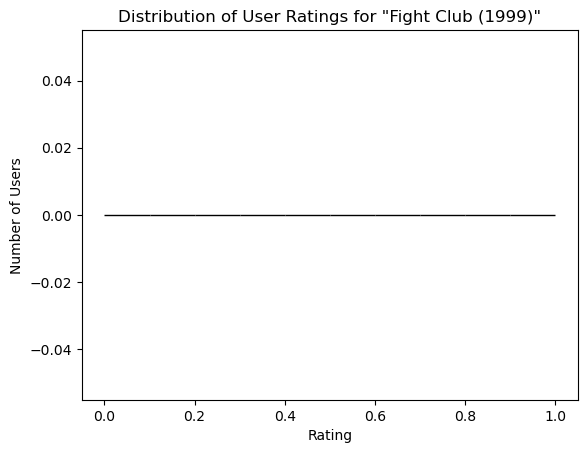

In [14]:
# Filter for ratings related to "Fight Club (1999)"
fight_club_ratings = ratings[ratings['movieId'] == 'Fight Club (1999)']

# Create a histogram of the ratings
plt.hist(fight_club_ratings['rating'], bins=10, edgecolor='black')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()


In [15]:

# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
grouped_ratings = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])

# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
merged_df = pd.merge(movie, grouped_ratings, on='movieId', how='inner')

# Filter only those movies which have more than 50 user ratings (i.e. > 50)
filtered_df = merged_df[merged_df['count'] > 50]


In [16]:
filtered_df

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [17]:
sorted_df = filtered_df.sort_values(by='mean', ascending=False)

# Get the title of the most popular movie
most_popular_movie = sorted_df.iloc[0]['title']

print(f"The most popular movie based on average user ratings is {most_popular_movie}.")

The most popular movie based on average user ratings is Shawshank Redemption, The (1994).


In [18]:
# Get the titles of the top 5 popular movies
top_5_popular_movies = sorted_df.iloc[:5]['title']

print(f"The top 5 popular movies based on number of user ratings are:\n{top_5_popular_movies}")

The top 5 popular movies based on number of user ratings are:
277                      Shawshank Redemption, The (1994)
659                                 Godfather, The (1972)
2224                                    Fight Club (1999)
974                                 Cool Hand Luke (1967)
602     Dr. Strangelove or: How I Learned to Stop Worr...
Name: title, dtype: object


In [19]:

# Get the title of the third most popular Sci-Fi movie
third_popular_movie = filtered_df[filtered_df['genres'].str.contains("Sci-Fi")]

sorted_df=third_popular_movie.sort_values(by="count",ascending=False)
sorted_df


,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [20]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [ ]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    print(URL)
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
#     print("imdb rating is", imdb_rating)
    print("imdb rating is", imdb_rating.text)
    return float(imdb_rating.text) if imdb_rating else np.nan

highest_rating = 0
highest_ratedmovieId = None
for _, row in links.iterrows():
    imdbId = row['imdbId']
    movieId = row['movieId']
    rating = scrapper(imdbId)
    if rating > highest_rating:
        highest_rating = rating
        highest_rated_movieId = movieId

https://www.imdb.com/title/tt0114709/
imdb rating is 8.3
https://www.imdb.com/title/tt0113497/
imdb rating is 7.1
https://www.imdb.com/title/tt0113228/
imdb rating is 6.6
https://www.imdb.com/title/tt0114885/
imdb rating is 6.0
https://www.imdb.com/title/tt0113041/
imdb rating is 6.1
https://www.imdb.com/title/tt0113277/
imdb rating is 8.3
https://www.imdb.com/title/tt0114319/
imdb rating is 6.3
https://www.imdb.com/title/tt0112302/
imdb rating is 5.5
https://www.imdb.com/title/tt0114576/
imdb rating is 5.8
https://www.imdb.com/title/tt0113189/
imdb rating is 7.2
https://www.imdb.com/title/tt0112346/
imdb rating is 6.8
https://www.imdb.com/title/tt0112896/
imdb rating is 5.8
https://www.imdb.com/title/tt0112453/
imdb rating is 7.1
https://www.imdb.com/title/tt0113987/
imdb rating is 7.1
https://www.imdb.com/title/tt0112760/
imdb rating is 5.7
https://www.imdb.com/title/tt0112641/
imdb rating is 8.2
https://www.imdb.com/title/tt0114388/
imdb rating is 7.7
https://www.imdb.com/title/tt01

imdb rating is 5.6
https://www.imdb.com/title/tt0113492/
imdb rating is 5.6
https://www.imdb.com/title/tt0113500/
imdb rating is 4.3
https://www.imdb.com/title/tt0113540/
imdb rating is 7.0
https://www.imdb.com/title/tt0113677/
imdb rating is 7.5
https://www.imdb.com/title/tt0113690/
imdb rating is 6.0
https://www.imdb.com/title/tt0107447/
imdb rating is 6.6
https://www.imdb.com/title/tt0113729/
imdb rating is 5.3
https://www.imdb.com/title/tt0113749/
imdb rating is 7.0
https://www.imdb.com/title/tt0113820/
imdb rating is 5.3
https://www.imdb.com/title/tt0110604/
imdb rating is 6.7
https://www.imdb.com/title/tt0110620/
imdb rating is 6.0
https://www.imdb.com/title/tt0113957/
imdb rating is 6.0
https://www.imdb.com/title/tt0113986/
imdb rating is 5.5
https://www.imdb.com/title/tt0114095/
imdb rating is 6.5
https://www.imdb.com/title/tt0114194/


In [ ]:
highest_scifi_rating = 0
highest_rated_scifi_movieId = None

for index, row in links.iterrows():
    imdbId = row['imdbId']
    movieId = row['movieId']
    genres = row['genres']

    # Check if the genre contains 'Sci-Fi'
    if 'Sci-Fi' in genres:
        rating = scrapper(imdbId)
        if rating > highest_rating:
            highest_scifi_rating = rating
            highest_rated_scifi_movieId = movieId

print(f"The movieId of the highest-rated Sci-Fi movie is {highest_rated_scifi_movieId} with a rating of {highest_scifi_rating}.")